## Executive Summary


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train11 = pd.read_csv('train11.csv', index_col=0, header = 0)

### **About this analysis**

Based on a dataset from **Ames, Iowa**, the US housing market from **2006 to 2010** was analyzed. The analysis applies to family houses with no pools in the RL or RM zone, with one or two stories and standard electricity. The houses were purchased with a warranty deed in normal sales condition.

### **Findings**

From 2006 to 2010, the average sales price per year for a 35-year-old family house was about **USD 185,000 to USD 190,000**, with most lots ranging between **8,410sq.ft and 11,990sq.ft**. Central aircondition was a standard feature of most houses, for which a higher sales price of about **90% (USD 90,000)** was paid.

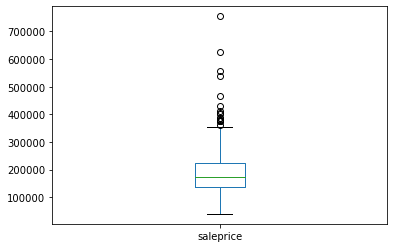

In [3]:
train11.saleprice.plot(kind ='box');

In [4]:
trend = train11.groupby(['yrsold'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()
trend.head()

<ipython-input-4-90ce1a1e3a78>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trend = train11.groupby(['yrsold'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()


,yrsold,lotarea,garagearea,saleprice
0,2006,12082.0,496.0,193657.0
1,2007,11439.0,483.0,187983.0
2,2008,10412.0,470.0,176574.0
3,2009,12045.0,494.0,188890.0
4,2010,11532.0,466.0,186633.0


Houses in RL zones were **larger** than in RM zones (comp. 7,000 to 8,000 sq.ft). **No relation** between number of stories and lot size could be detected in RL zones. In RM zones, one-story houses were around 1,000sq.ft smaller than two-story houses. 

In [5]:
train11.groupby(['mszoning','housestyle'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()

<ipython-input-5-26cae33631b9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train11.groupby(['mszoning','housestyle'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()


,mszoning,housestyle,lotarea,garagearea,saleprice
0,RL,1Story,11888.0,469.0,173405.0
1,RL,2Story,11779.0,535.0,225103.0
2,RM,1Story,6980.0,344.0,104670.0
3,RM,2Story,8098.0,397.0,139595.0


From 2006 to 2009, the number of **sales rose**. In spite of the populations' decreasing buying power, the financial crisis of 2007/2008, did not lead to a decline of sales. This might be attributed to foreclosed homes readily turned over in the housing market. In 2008, there was a **steep decline** in housing prices by approx. USD 10,000, while also **smaller houses** were sold. While housing prices **recovered to pre-crisis levels** in 2009, **sales declined** in 2010. This might be due to a moderation of the housing market following the bubble, or may also suggest an **incomplete dataset**.


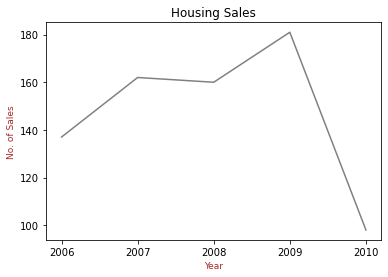

In [6]:
train11['no_houses'] = 1
no_houses = train11.groupby(['yrsold'])['no_houses'].sum().reset_index()
no_houses
fig, ax = plt.subplots()
x = no_houses['yrsold']
y = no_houses['no_houses']
ax.set_xlabel('Year', color="brown",fontsize=9)
ax.set_xticks([2006, 2007, 2008, 2009, 2010])
ax.set_ylabel('No. of Sales', color="brown",fontsize=9)
ax.set_title('Housing Sales')
ax.plot(x, y, color = 'grey');

<ipython-input-7-301d4434eac3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trend = train11.groupby(['yrsold'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()


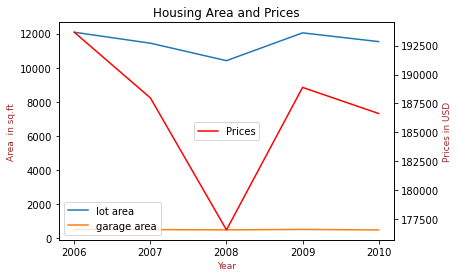

In [7]:
trend = train11.groupby(['yrsold'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()
trend.head()
fig, ax = plt.subplots()
x = trend['yrsold']
y1 = trend['lotarea']
y2 = trend['garagearea']
y3 = trend['saleprice']
ax.plot(x, y1, label = 'lot area');
ax.plot(x, y2, label = 'garage area');
ax.set_xlabel('Year', color="brown",fontsize=9)
ax.set_xticks([2006, 2007, 2008, 2009, 2010])
ax.set_ylabel('Area  in sq.ft', color="brown",fontsize=9)
ax.set_title('Housing Area and Prices')
ax.legend(loc = 'lower left')
ax2 = ax.twinx()
ax2.plot(x, y3, color = 'red', label = 'Prices')
ax2.set_ylabel("Prices in USD",color="brown",fontsize=9)
ax2.legend(loc = 10)
plt.show()

Most houses had garages that fit **2 cars**. While housing prices seem to **positively correlate** with larger garages, at garages that fit four cars housing price sink again to similar levels like houses with garages for two cars. However, this may be due to a **lack of data**, since only few houses for four cars were sold. 

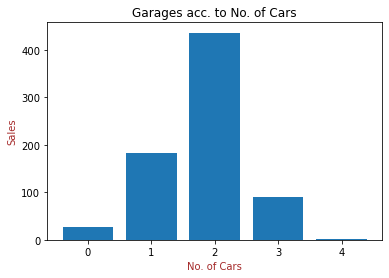

In [8]:
garage_price = train11.groupby('garagecars')['saleprice'].agg(["count", "sum"]).reset_index()
garage_price.columns = ['garagecars', 'no_garages', 'price']
garage_price2 = pd.DataFrame(garage_price)
x = garage_price2['garagecars']
y = garage_price2['no_garages']
plt.bar(x,y)
plt.xlabel ('No. of Cars', color = 'brown')
plt.ylabel('Sales', color = 'brown')
plt.title('Garages acc. to No. of Cars')
plt.show();

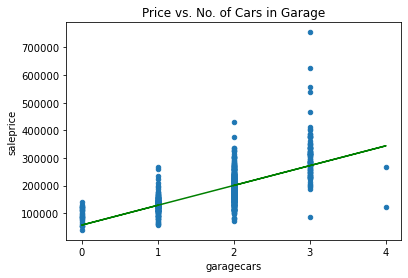

In [9]:
x = train11['garagecars']
y = train11['saleprice']
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit() 
train11.plot.scatter(x='garagecars', y = 'saleprice')
plt.xticks([0,1,2,3,4])
plt.title('Price vs. No. of Cars in Garage')
plt.plot(x, results.predict(X), color = 'green')
plt.show();